# Cytoplasmic segmentation with CellPose

In this notebook you'll find cytoplasmic segmentation method with CellPose applied to PDAC B2 image from PDAC dataset

- Cellpose tutorial (on squipdy) : https://squidpy.readthedocs.io/en/stable/external_tutorials/tutorial_cellpose_segmentation.html

The save function for the masks was found here : https://github.com/theislab/squidpy_reproducibility/blob/master/notebooks/image_figures/feature_extraction_workflow.ipynb

*DO NOT USE THIS COMMANDE* "squidpy.im.ImageContainer.save" (delete workspace)

# 0. Preliminary steps

## 0.1. Import packages

conda env create -f env_cellpose.yml

conda activate cellpose

pip install ipykernel

python -m ipykernel install --user --name=cellpose --display-name=Cellpose

pip install imagecodecs

pip install opencv-python

In [1]:
import os
import squidpy as sq
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cellpose import models

## 0.2. Set pathways for outputs

In [2]:
path_images = "./input_images" 

In [3]:
## Result folder 
output_path = f"/sbgenomics/output-files/data/segmentation_cellpose"
os.makedirs(output_path, exist_ok=True)

In [4]:
path = f"./masks_segmentation"
os.makedirs(path, exist_ok=True)

## 0.3. Fonctions definition

In [5]:
def cellpose_he(img, min_size=15, flow_threshold=0.4, channel_cellpose=0):
    """Run cellpose and get masks

    Parameters
    ----------
    img : array of image
    min_size : int
         minimum number of pixels per mask
    flow_threshold : float
        flow error threshold
    channel_cellpose : list
        list of channels

    Returns
    -------
    res : list of array
        mask labels
    """
    model = models.Cellpose(model_type='cyto')
    res, _, _, _ = model.eval(
        img,
        channels=[channel_cellpose, 0],
        diameter=None,
        min_size=min_size,
        invert=True,
        flow_threshold=flow_threshold,
    )
    return res

In [1]:
def plot_results_segmentation(segmented_img):
    """Plot segmentation results
    
    Parameters
    ----------
    segmented_img : array of image
    """
    # Print the container
    print(segmented_img)

    # Print the numbre of segments
    print(f"Number of segments in crop: {len(np.unique(segmented_img['segmented_custom']))}")

    # Plot the original input image VS the mask
    fig, axes = plt.subplots(1, 2, figsize=(10, 20))
    segmented_img.show("image", channel=None, ax=axes[0])
    _ = axes[0].set_title("H&E")
    segmented_img.show("segmented_custom", cmap="jet", interpolation="none", ax=axes[1])
    _ = axes[1].set_title("Cellpose segmentation")

# 1. Perform cytoplasmic segmentation on PDAC B2 image

In [7]:
image_name = "PDAC_ILS50185PT2_B2"

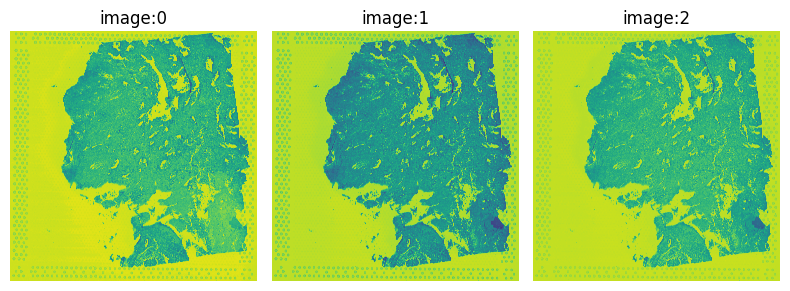

In [8]:
# Load image into an ImageContainer
whole_img_norm = sq.im.ImageContainer("normalized_images_hne/PDAC_ILS50185PT2_B2/PDAC_ILS50185PT2_B2_normalized.jpg")

# Show the image in 3 channels with color inverted
whole_img_norm.show("image", channelwise=True)

In [9]:
# Run segmentation with CellPose method
sq.im.segment(img=whole_img_norm, layer="image", channel=None, method=cellpose_he, channel_cellpose=0, flow_threshold=0.8)

ImageContainer[shape=(17107, 16907), layers=['image', 'segmented_custom']]
Number of segments in crop: 30517


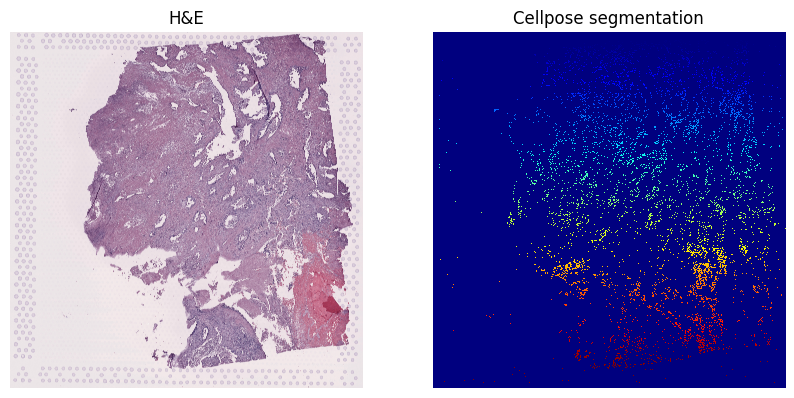

In [10]:
plot_results_segmentation(whole_img_norm)

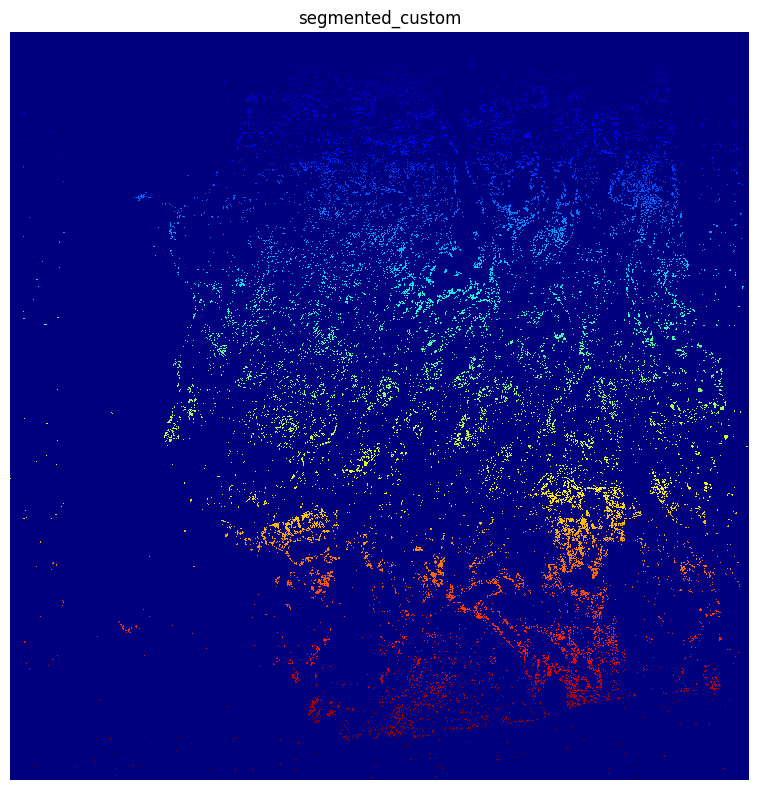

In [11]:
# Show the mask and save it in the output of seven bridges
whole_img_norm.show("segmented_custom", cmap="jet", interpolation="None", save= f"{output_path}/norma_whole_{image_name}_mask")

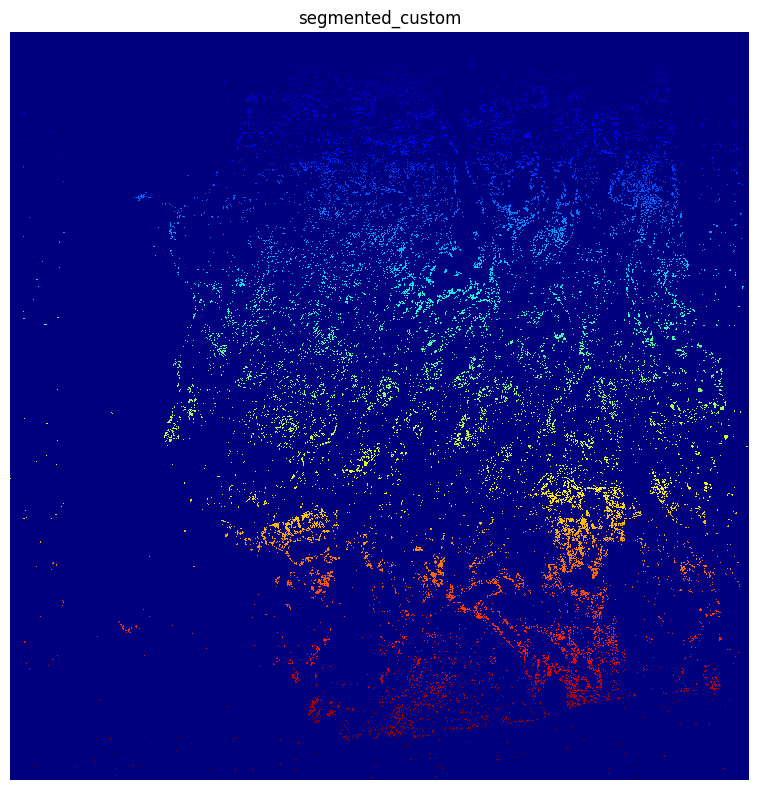

In [12]:
# Show the mask and save it in the output of the workspace
whole_img_norm.show("segmented_custom", cmap="jet", interpolation="None", save= f"{path}/norma_whole_{image_name}_mask")

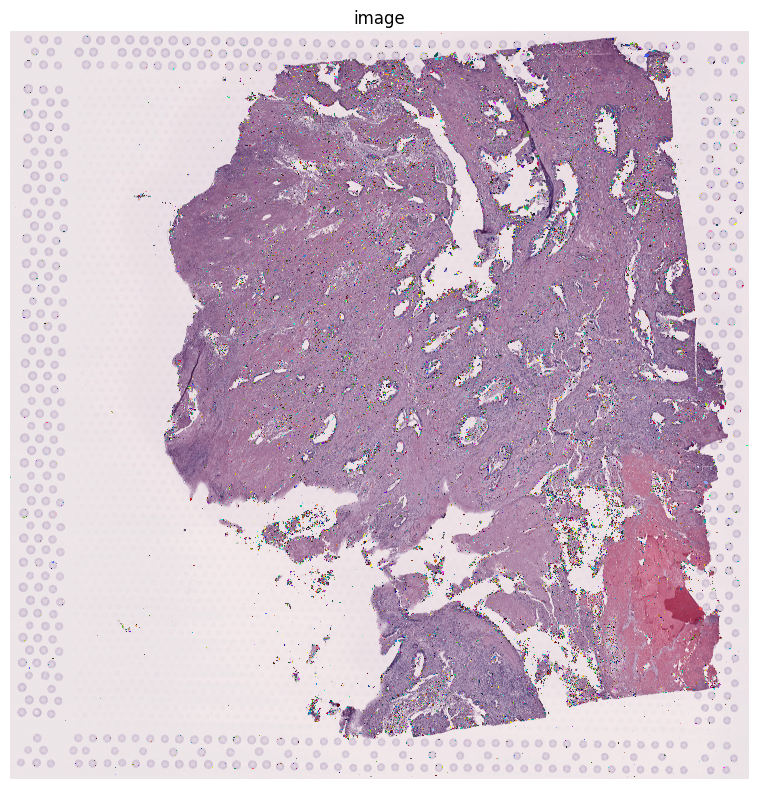

In [13]:
# Show the mask on the original input
whole_img_norm.show("image", segmentation_layer="segmented_custom", segmentation_alpha=0.9)

The results are not satisfactory so we don't pursue the analysis with this tool.